In [1]:
####################################################################
###    This is the PYTHON version of program 6.1 from page 194 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### % It is the SIR epidemic model with constant additive noise    #
### added to the transmission rate.								   #
### Given the difficulties in integrating the dynamics, the user   #
### is prompted for a integration time-step.					   #
####################################################################

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*f amount of noise experienced in the transmission term.

*ξ noise term which is generated as a function of the time step.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*mu is the per capita birth and death rate.

*X0 is the initial number or density of susceptible individuals.

*Y0 is the initial number or density of infectious individuals.

*N is the population size -- assumed to be constant.

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [3]:
beta=1.0;
noise=10;
gamma=1/10.0;
mu=1/(50*365.0);
X0=1e5;
Y0=500;
N0=1e6;
Step=1;
ND=MaxTime=5*365.0;
TS=1.0

In [4]:
INPUT0=np.hstack((X0,Y0))

In [5]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP     
	Y[0] = mu * N0 - beta*V[0]*V[1]/N0 - Noise - mu*V[1]
	Y[1] = beta*V[0]*V[1]/N0 + Noise -  mu*V[1] - gamma*V[1]
	return Y   # For odeint


In [6]:
T=np.zeros((int(np.ceil(ND/Step)),1))
RES=np.zeros((int(np.ceil(ND/Step)),2))
INPUT=INPUT0
t=0
loop=0

while t<ND and INPUT[0]>0 and INPUT[1]>0:
	t_start = 0.0; t_end = t_start+Step; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	sqrtStep=np.sqrt(Step)
	Noise=noise* np.random.normal(size=1)/sqrtStep
	PRES = spi.odeint(diff_eqs,INPUT,t_range)
	T[loop]=t=t+Step
	INPUT=PRES[-1]
	RES[loop]=PRES[-1]
	loop += 1

print(RES)

[[ 99983.70980595    520.02737815]
 [ 99987.03137653    519.46856758]
 [100000.41231709    509.3832289 ]
 ...
 [102171.25451788   2162.91830645]
 [101986.4607814    2184.87573511]
 [101817.04354177   2190.09655263]]


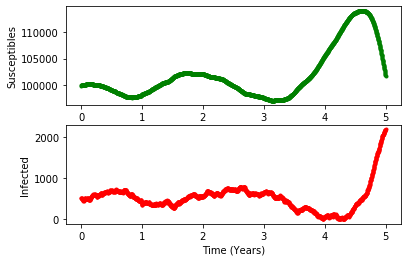

In [7]:
### plotting
pl.subplot(211)
pl.plot(T/365., RES[:,0], '.-g')
pl.xlabel('Time (Years)')
pl.ylabel('Susceptibles')
pl.subplot(212)
pl.plot(T/365., RES[:,1], '.-r')
pl.ylabel('Infected')
pl.xlabel('Time (Years)')

pl.show()